# Analyse de texte de Germinal

Analyse du champ lexical de la mine dans Germinal sans bibliothèque de NLP

In [5]:
import re
import matplotlib.pyplot as plt

In [6]:
# Récupération du texte
with open("Germinal_Texte_entier.txt", encoding="utf-8") as file:
    data = file.read()
data[:100]

'Germinal/Texte entier\n\n\n\n\n\nExporté de Wikisource le 30 janvier 2022\n\n\n\n\n\nPREMIÈRE PARTIE\n\n\n\n\n\nI\n\n\n\n\n'

In [7]:
# Création du dictionnaire = mots uniques du corpus
words = re.split(r'\W+', data.lower())
dictionary = set(words)

In [8]:
# Vérification de la présence des mots dans le dictionnaire
"compagnie" in dictionary

True

In [9]:
# Création des documents du corpus
sentences = re.split(r'(?<=[^A-Z].[.?!])( |\n)+(?=[A-Z])', data)
sentences = [s for s in sentences if s not in [" ", "\n"]]
sentences = sentences[:-8]
sentences = [sentences[0].split("\n")[-1]] + sentences[1:]

In [10]:
# Création d'une liste de mots du champ lexical de la mine avec les pluriels
voc_mine = ["mine", "mineur", "coron", "charbon", "coke", "haveur", "herscheuse", "galibot", "moulineur", "compagnie"]
pluriel = [word + "s" for word in voc_mine]
mine = voc_mine + pluriel

In [11]:
# Détection des occurences d'apparition du vocabulaire de la mine
occurence = []
for i, w in enumerate(words):
    if w in mine:
        occurence.append(i)

In [35]:
# Récupération des indices de début des grandes parties du livre
parts = {f"Partie {i}":None for i in range(1, 8)}
parts["Partie 1"] = 0
nom_numero = [
    "deuxième", "troisième", "quatrième",
    "cinquième", "sixième", "septième",
]
indice = 0
for i, w in enumerate(words):
    if w == "partie":
        if words[i-1] == nom_numero[indice]:
            parts[f"Partie {indice+2}"] = i
            indice += 1
            if indice==6:
                break
print(parts)

{'Partie 1': 0, 'Partie 2': 23454, 'Partie 3': 44149, 'Partie 4': 65484, 'Partie 5': 98023, 'Partie 6': 124367, 'Partie 7': 146163}


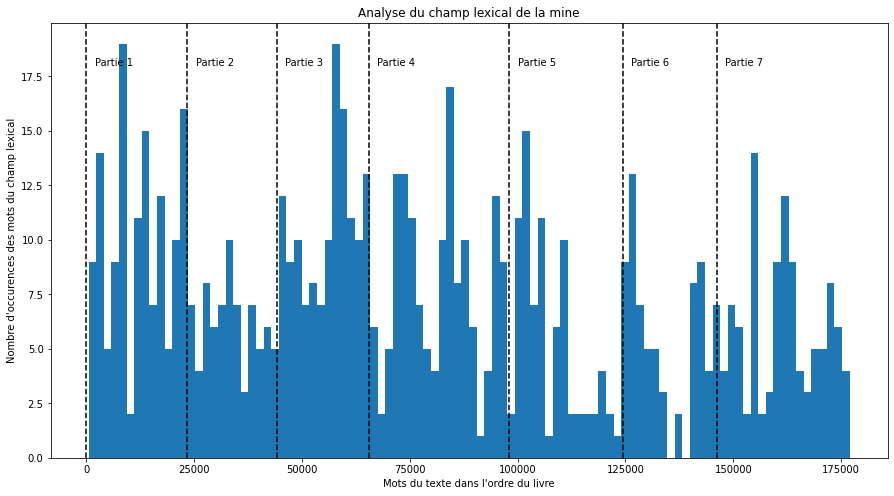

In [71]:
# Visualisation des résultats
plt.figure(figsize=(15,8))
plt.hist(occurence, bins=100)
for key, val in parts.items():
    plt.axvline(x=val, color='k', linestyle='--')
    plt.text(val+2000, 18, key, horizontalalignment="left")
plt.ylabel("Nombre d'occurences des mots du champ lexical")
plt.xlabel("Mots du texte dans l'ordre du livre")
plt.title("Analyse du champ lexical de la mine")
plt.show()